For different z's, plot how avgvel shifts as epochs increase.

In [38]:
import numpy as np
import glob
import csv
import os

sample_z_cnt = 9 # [0.1, 0.5, 0.9]; or 5 if use [0.1, 0.3, 0.5, 0.7, 0.9]
# use [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

total_runs = 3
this_run_info = [f'0523_0101_take2', f'0523_0101_take3', f'0523_0101_take4']

total_eps = 60
start_eps = 4
stepsize = 8

avgvel_dir = []
for i in range(total_runs):
    this_avgvel_dir = f'test/all_avgvel_ade_fde/{this_run_info[i]}'
    avgvel_dir.append(this_avgvel_dir)


ade_all = np.zeros((total_runs, sample_z_cnt, total_eps//stepsize+1))
fde_all = np.zeros((total_runs, sample_z_cnt, total_eps//stepsize+1))
avgvel_all = np.zeros((total_runs, sample_z_cnt, total_eps//stepsize+1))

In [39]:
for j in range(total_runs):
    for i in range(start_eps, total_eps+1, stepsize):
        cp_num = str(i)
        this_csv_file = f'{avgvel_dir[j]}/{cp_num}.csv'
        all_this_epoch = np.genfromtxt(this_csv_file, delimiter=',')
        ade_all[j, :, i//stepsize] = all_this_epoch[:,0]
        fde_all[j, :, i//stepsize] = all_this_epoch[:,1]
        avgvel_all[j, :, i//stepsize] = all_this_epoch[:,2]

In [40]:

mean_avgvel = np.log10(np.mean(avgvel_all, axis=0))
var_avgvel = np.var(avgvel_all, axis=0)

# print(avgvel_all.shape)
# print(mean_avgvel[0,7])
print(var_avgvel)

mean_ade = np.mean(ade_all, axis=0)
var_ade = np.var(ade_all, axis=0)

mean_fde = np.mean(fde_all, axis=0)
var_fde = np.var(fde_all, axis=0)


[[8.12545676e-06 6.28832902e-04 2.01309450e-04 1.73481107e-04
  1.07619666e-04 2.19082364e-05 3.66414347e-05 2.51661202e-05]
 [5.01308127e-05 5.45554023e-04 5.78156855e-04 3.10627512e-04
  9.41608322e-05 2.36685508e-05 5.22757976e-05 6.65727138e-06]
 [1.07261917e-04 1.18822167e-04 3.09511883e-04 2.13118382e-04
  4.80842854e-05 3.81234181e-05 4.16749978e-05 6.51496238e-06]
 [8.16845104e-05 1.19272522e-05 1.45943852e-05 1.58487072e-05
  4.48833813e-06 9.10047081e-06 4.32844743e-06 5.47236299e-06]
 [4.60351886e-05 9.72782421e-07 6.54981217e-06 5.11009191e-07
  1.59517424e-07 9.06555144e-07 3.10301860e-07 8.26823681e-07]
 [2.42527279e-05 2.81070680e-07 8.13936661e-06 9.80358756e-08
  4.70884277e-08 4.03714797e-07 1.46019541e-07 6.24789192e-07]
 [1.14672158e-05 1.03745416e-07 1.12967419e-05 8.18261361e-08
  1.18852873e-08 1.25188433e-07 5.27885140e-08 4.08668938e-07]
 [4.27193256e-06 3.48003626e-08 1.40362334e-05 1.26857242e-07
  3.72864844e-08 3.49686826e-08 1.90740248e-08 3.09087867e-07]


(8,)


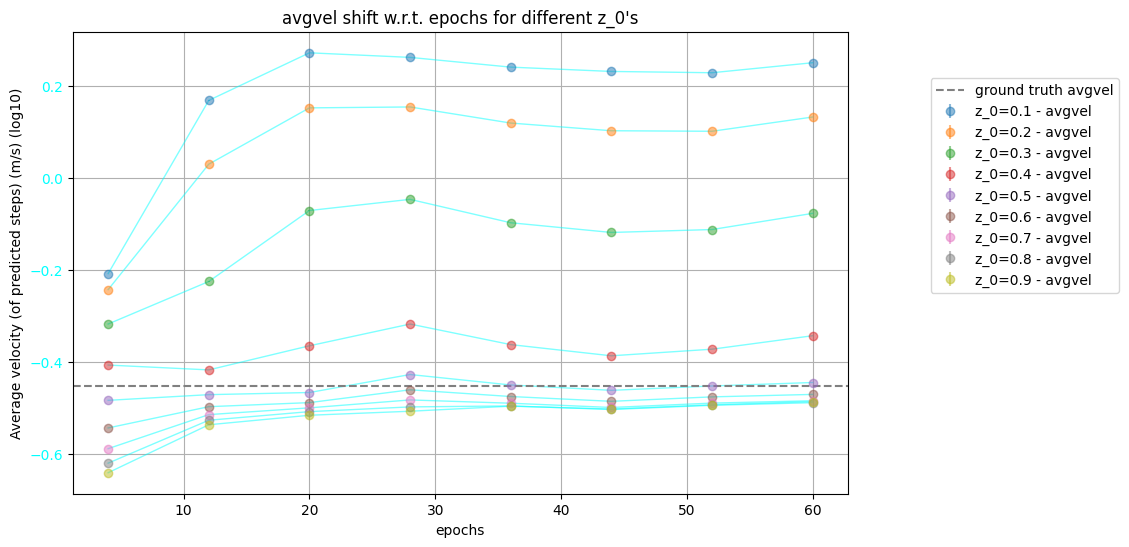

In [44]:
import matplotlib.pyplot as plt

x = np.arange(start_eps, total_eps+1, stepsize)
print(x.shape)

colors = plt.cm.tab10(range(sample_z_cnt))

# ax1.errorbar(x, mean_ade, yerr=var_ade, fmt='o', color='purple', alpha=0.5, label='ADE with error bars')

# ax1.set_ylabel('ADE (m)', color='purple')
# ax1.tick_params(axis='y',labelcolor='purple')

fig, ax2 = plt.subplots(figsize=(10,6))
ax2.set_xlabel('epochs')
ax2.grid(True)
for i in range(sample_z_cnt):
    z = round(0.1 + i*0.1, 1)  # Round z to 1 decimal place
    # ax2.scatter(x, avgvel_all[i,:],marker='s',s=50,c=colors[i],alpha=0.5,label=f'z_0={z} - avgvel')
    ax2.errorbar(x, mean_avgvel[i,:], yerr=var_avgvel[i,:], fmt='o', color=colors[i], alpha=0.5, label=f'z_0={z} - avgvel')
    ax2.plot(x, mean_avgvel[i,:],color='cyan',alpha=0.5, linestyle='-', linewidth=1)

ax2.set_ylabel('Average velocity (of predicted steps) (m/s) (log10)')
ax2.tick_params(axis='y',labelcolor='cyan')

ax2.axhline(y=-0.4528, color='grey', linestyle='--', label='ground truth avgvel')

# lines1, labels1 = ax1.get_legend_handles_labels()
# lines1, labels1 = None, None
lines2, labels2 = ax2.get_legend_handles_labels()
# ax1.legend(lines1+lines2, labels1+labels2, bbox_to_anchor=(1.35,0.9), borderaxespad=0.)
ax2.legend(lines2, labels2, bbox_to_anchor=(1.35,0.9), borderaxespad=0.)


plt.title("avgvel shift w.r.t. epochs for different z_0's")
plt.show()


# for i in range(sample_z_cnt):
#     z = round(0.1 + i*0.1, 1)  # Round z to 1 decimal place
#     ax1.scatter(x, ade_all[i,:],s=50,c=colors[i],alpha=0.5,label=f'z_0={z} - FDE')
#     ax1.plot(x, ade_all[i,:],color='red',alpha=0.5, linestyle='-', linewidth=1)

#################################################################################33

# ax1.set_xlabel('epochs')
# ax1.set_ylabel('ADE (m)', color='purple')
# ax1.tick_params(axis='y',labelcolor='purple')
# ax1.grid(True)

# ax2 = ax1.twinx()

# for i in range(sample_z_cnt):
    
#     z = round(0.1 + i*0.1, 1)  # Round z to 1 decimal place
#     ax2.scatter(x, avgvel_all[i,:],marker='s',s=50,c=colors[i],alpha=0.5,label=f'z_0={z} - avgvel')
#     ax2.plot(x, avgvel_all[i,:],color='cyan',alpha=0.5, linestyle='-', linewidth=1)

# ax2.set_ylabel('Average velocity (of predicted steps) (m/s)', color='cyan')
# ax2.tick_params(axis='y',labelcolor='cyan')

# ax2.axhline(y=0.3525, color='grey', linestyle='--', label='ground truth avgvel')

# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax1.legend(lines1+lines2, labels1+labels2, bbox_to_anchor=(1.35,0.9), borderaxespad=0.)

# plt.title("ADE/avgvel shift w.r.t. epochs for different z_0's")
# plt.show()